
# Health Insurance Cross Sell Prediction

## Contents:
1. Background<br>
2. Import Data and Preliminary Analysis<br>
3. Analyzing the Data<br>
4. Shape Data for Model<br>
4. Correlation of Variables<br>
5. Generalized Linear Model<br>

## 1. Background:

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

Source: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

**id**:	Unique ID for the customer<br>
**Gender**:	Gender of the customer<br>
**Age**:	Age of the customer<br>
**Driving_License**:	0 : Customer does not have DL, 1 : Customer already has DL<br>
**Region_Code**:	Unique code for the region of the customer<br>
**Previously_Insured**:	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance<br>
**Vehicle_Age**:	Age of the Vehicle<br>
**Vehicle_Damage**:	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.<br>
**Annual_Premium**:	The amount customer needs to pay as premium in the year<br>
**PolicySalesChannel**:	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
**Vintage**:	Number of Days, Customer has been associated with the company<br>
**Response**:	1 : Customer is interested, 0 : Customer is not interested<br>

## 2. Import Data and Preliminary Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [201]:
# Import train and test datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
# Explore the train dataset
# Note: the dependent variable is the Response
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [27]:
# Explore the train dataset
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [28]:
train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


## 3. Analyzing the Data

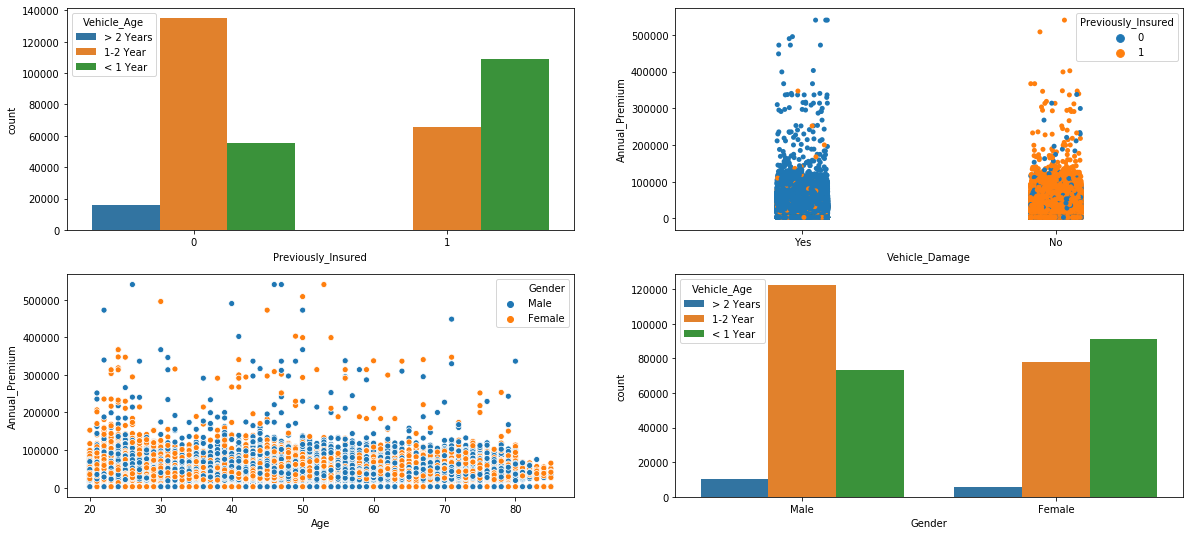

In [98]:
f, axes = plt.subplots(2,2, figsize = (20,9), sharex = False, sharey = False)
sns.countplot(x = 'Gender', hue = 'Vehicle_Age',data = train, ax = axes[1,1])
sns.scatterplot(x = 'Age', y = 'Annual_Premium', hue = 'Gender', data = train, ax = axes[1,0])
sns.stripplot(x = 'Vehicle_Damage', y = 'Annual_Premium', data = train, hue = 'Previously_Insured', jitter = True, ax = axes[0,1])
sns.countplot(data = train, x = 'Previously_Insured', hue = 'Vehicle_Age', ax = axes[0,0])

There is a high number of vehicles that are insured that have an age of 1-2 years and have not been previously insured. For cars that have been previously insured, there is a high number of cars that have an age of less than 1 year. Cars that have had vehicle damage in the past have often not been insured previously.<br>
There seems to be a higher premium for those that are of a lower age, i.e. 20 - 30 years old. There seems to be significantly less outliers, in premium, as the age of the policyholder increases. <br>
Males also have a higher vehicle age of 1-2 years as compared to women. Women are more likely to have a car that is atleast 1 year old

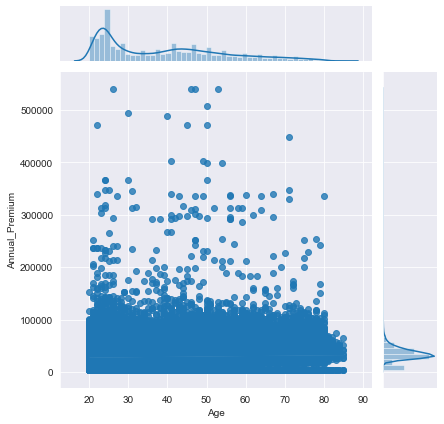

In [109]:
sns.jointplot(data = train, x = 'Age',y = 'Annual_Premium', kind = 'reg')

As seen by the joint plot, the majority of policyholders seem to be between the ages of 20 to 30  with most of the annual premium falling below 100,000. However, there are significant in mid-age policyholders but this decreases rapidly as the policyholder age increases.

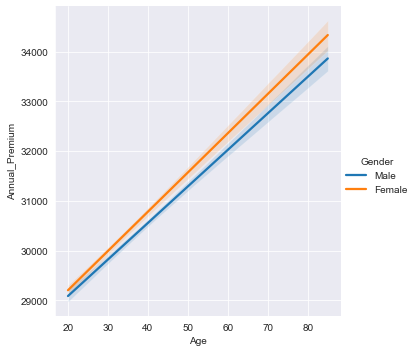

In [130]:
sns.lmplot(x = 'Age', y = 'Annual_Premium', hue = 'Gender',
           data = train, scatter = False)

Based on the linear plot above, there is a steeper slope for Female than for Males. This means that the Premium for Females is higher and rises at a faster rate as age increases. This will be explored further in the correlation plots

## 4. Shape Data for Model

from the preliminary analysis from the dataset, we can see that the Vehicle_Age and Vehicle_Damage will need to be changed.
<br>Vehicle_Age will need to be replaced by the number of years.
<br>Vehicle Damage will need to be replaced to 0 or 1 for No or Yes respectively.
<br>Gender needs to be replace with 0 or 1 for Male and Female respectively

In [202]:
# Train Dataset

# Change the Vehicle Age to numerical categories for the following:
# '> 2 Years' - 1
# '1-2 Years' - 2
# '< 1 Year' - 3
unique_val = list(train['Vehicle_Age'].unique())
train['Vehicle_Age'].loc[(train['Vehicle_Age'] == unique_val[0])] = np.int64(1)
train['Vehicle_Age'].loc[(train['Vehicle_Age'] == unique_val[1])] = np.int64(2)
train['Vehicle_Age'].loc[(train['Vehicle_Age'] == unique_val[2])] = np.int64(3)
train['Vehicle_Age'] = train['Vehicle_Age'].astype(int)

# Change the Vehicle Damage categories for the following:
# No - 0
# Yes - 1
train['Vehicle_Damage'].loc[(train['Vehicle_Damage'] == 'No')] = float(0)
train['Vehicle_Damage'].loc[(train['Vehicle_Damage'] == 'Yes')] = float(1)
train['Vehicle_Damage'] = train['Vehicle_Damage'].astype(int)

# Change the Gender categories for the following:
# Male - 0
# Female - 1
train['Gender'].loc[(train['Gender'] == 'Male')] = np.int64(0)
train['Gender'].loc[(train['Gender'] == 'Female')] = np.int64(1)
train['Gender'] = train['Gender'].astype(int)

In [220]:
# Test Dataset

# Change the Vehicle Age to numerical categories for the following:
# '> 2 Years' - 1
# '1-2 Years' - 2
# '< 1 Year' - 3
unique_val = list(test['Vehicle_Age'].unique())
test['Vehicle_Age'].loc[(test['Vehicle_Age'] == unique_val[0])] = np.int64(1)
test['Vehicle_Age'].loc[(test['Vehicle_Age'] == unique_val[1])] = np.int64(2)
test['Vehicle_Age'].loc[(test['Vehicle_Age'] == unique_val[2])] = np.int64(3)
test['Vehicle_Age'] = test['Vehicle_Age'].astype(int)

# Change the Vehicle Damage categories for the following:
# No - 0
# Yes - 1
test['Vehicle_Damage'].loc[(test['Vehicle_Damage'] == 'No')] = float(0)
test['Vehicle_Damage'].loc[(test['Vehicle_Damage'] == 'Yes')] = float(1)
test['Vehicle_Damage'] = test['Vehicle_Damage'].astype(int)

# Change the Gender categories for the following:
# Male - 0
# Female - 1
test['Gender'].loc[(test['Gender'] == 'Male')] = np.int64(0)
test['Gender'].loc[(test['Gender'] == 'Female')] = np.int64(1)
test['Gender'] = test['Gender'].astype(int)


D:\Spyder\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


## 5. Correlation of Variables

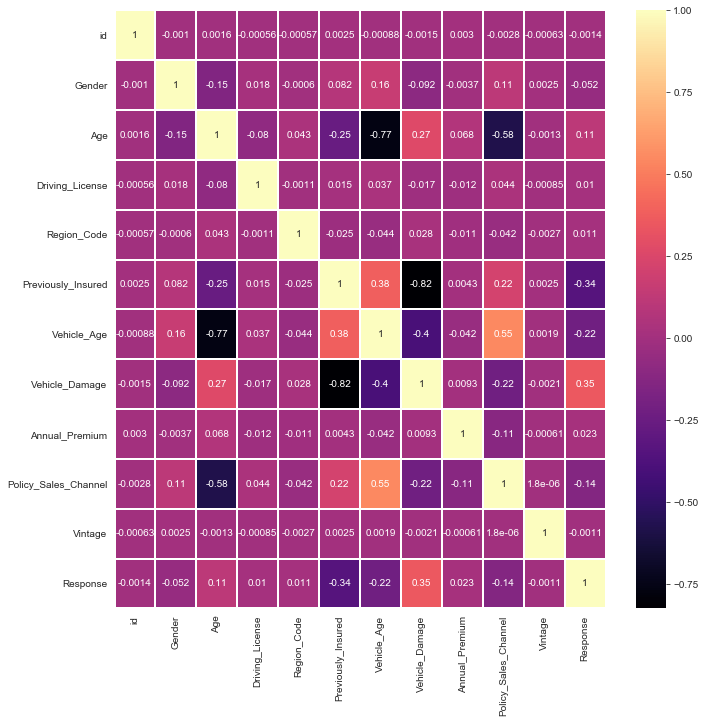

In [205]:
corr_data = train.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr_data, annot = True, cmap = 'magma', linecolor = 'white',
           linewidths = 1)


From the correlation plot, we see that age has a high inverse relationship with vehicle age. As a result, people that are older are less likely to have an older vehicle. Vehicle damage also has an high inverse relationship with cars that were previously insured. This means that cars in a prior accident or that had sustain damage were less likely to have been previously insured.<br><br>
From the correlation plot it seems that Vehicle Damage and Previously insured seem to have the highest correlation with the dependent variable (response). Vehicle Damage seems to have a high correlation with a positive response. This seems very plausible as individuals that have sustained vehicle damage are more likely to get car insurance. However, individuals that were previously insured are less likely to respond with a "Yes" most likely because they intend on staying with the current insurance company.


## 6. Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [206]:
# Crete dependent variable
y_train = train['Response']
# Drop Response and id columns (train and test datasets)
train.drop('Response', axis = 1, inplace = True)
train.drop('id', axis = 1, inplace = True)
test.drop('id', axis = 1, inplace = True)
# Create x_train
x_train = train

In [236]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.276812
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:               381109
Model:                          Logit   Df Residuals:                   381099
Method:                           MLE   Df Model:                            9
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:                  0.2559
Time:                        21:29:32   Log-Likelihood:            -1.0550e+05
converged:                       True   LL-Null:                   -1.4177e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Gender                  -0.1082      0.011     -9.759      0.000      -0.130      -0.08

In [251]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',max_iter = 400)
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=400,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [278]:
y_pred = logreg.predict(test)
# Import actual predictions
actual_pred = pd.read_csv('sample_submission.csv')

In [270]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(actual_pred['Response'], y_pred))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    127037
           1       0.00      0.00      0.00         0

    accuracy                           0.89    127037
   macro avg       0.50      0.45      0.47    127037
weighted avg       1.00      0.89      0.94    127037



D:\Spyder\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
# Create Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(actual_pred['Response'], y_pred)
print(confusion_matrix)

[[113267  13770]
 [     0      0]]
